In [37]:
# Davide's code for the electrostatic potential of four positive charges
# First I import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [38]:
q=np.array([1.,1,1,1])  # the four charges (note I assume kC=1 throughout)
xCharge=np.array([-1,1,1,-1.])   # x coordinate of the charges
yCharge=np.array([-1,-1,1,1.])   # y coordinate of the charges
zCharge=np.array([0,0,0,0.])    # z coordinate of the charges

# this is a python function to calculate the potential for one charge
def potentialElectricField(r,rCharge,q):
    # r is the position(s) at which I want to calcualte the potential. array of dimension (3,n)
    # rCharge is the position of the charge. Array or list of dimension (3)
    # q is the value of the charge (a scalar)
    dist=np.sqrt((r[0,:]-rCharge[0])**2+(r[1,:]-rCharge[1])**2+(r[2,:]-rCharge[2])**2)
    return(q/dist)

In [39]:
# here I compute the field along the three axes
theAx=np.arange(-10,10,.1)

#start with the x-axis
r=np.zeros([3,theAx.size])
r[0,:]=theAx
fieldX=theAx*0
for i in range(xCharge.size):
    fieldX=fieldX+potentialElectricField(r,[xCharge[i],yCharge[i],zCharge[i]],q[i])
# then the y-axis
r=np.zeros([3,theAx.size])
r[1,:]=theAx
fieldY=theAx*0
for i in range(xCharge.size):
    fieldY=fieldY+potentialElectricField(r,[xCharge[i],yCharge[i],zCharge[i]],q[i])
# then the z-axis
r=np.zeros([3,theAx.size])
r[2,:]=theAx
fieldZ=theAx*0
for i in range(xCharge.size):
    fieldZ=fieldZ+potentialElectricField(r,[xCharge[i],yCharge[i],zCharge[i]],q[i])


<IPython.core.display.Javascript object>


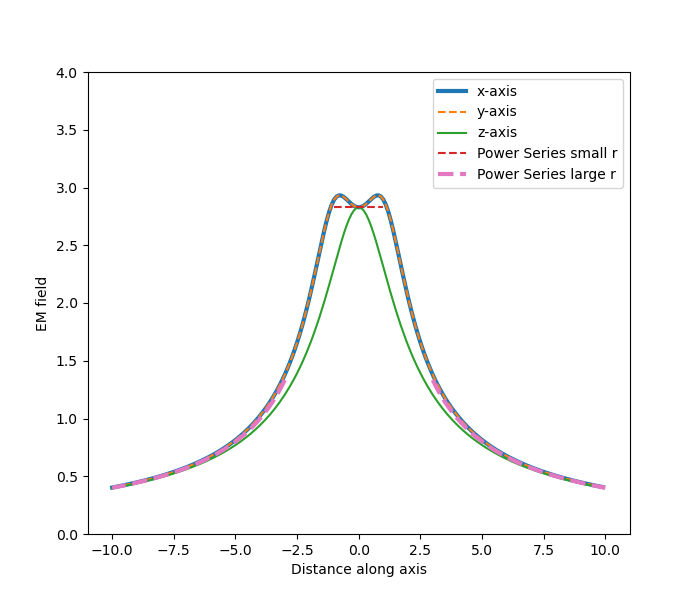

In [40]:
# now plotting the fields and the power-series approximation at small and large radii
plt.figure(1,figsize=[7,6])
plt.plot(theAx,fieldX,label='x-axis',lw=3)
plt.plot(theAx,fieldY,ls='--',label='y-axis')
plt.plot(theAx,fieldZ,label='z-axis')

xSmall=np.arange(-1,1.0001,.1)
plt.plot(xSmall,xSmall*0+4/np.sqrt(2),ls='--',label='Power Series small r')
xLarge=np.arange(3,10.0001,.01)
plt.plot(xLarge,4/np.abs(xLarge),ls='--',label='Power Series large r',color='C6',lw=3)
plt.plot(-xLarge,4/np.abs(xLarge),ls='--',color='C6',lw=3)
plt.ylim([0,4])
plt.xlabel('Distance along axis')
plt.ylabel('EM field')
plt.legend()


In [41]:
#Now lets plot along the diagonal. 
# First compute
r=np.zeros([3,theAx.size])
r[0,:]=theAx
r[1,:]=theAx
fieldDiag=theAx*0
for i in range(xCharge.size):
    fieldDiag=fieldDiag+potentialElectricField(r,[xCharge[i],yCharge[i],zCharge[i]],q[i])

<IPython.core.display.Javascript object>


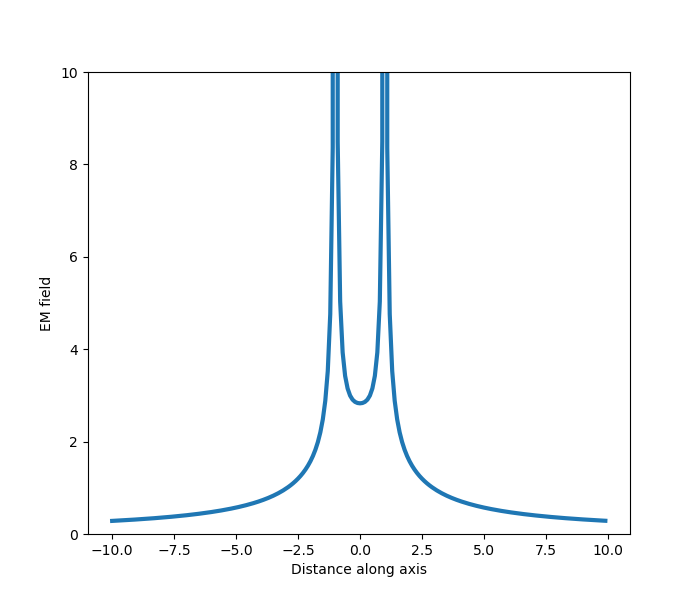

Text(0, 0.5, 'EM field')

In [42]:
# and plotting
plt.figure(4,figsize=[7,6])
plt.plot(theAx,fieldDiag,label='x-axis',lw=3)
plt.ylim([0,10])
plt.xlabel('Distance along axis')
plt.ylabel('EM field')
# notice I had to limit the y-axis range because the field diverges to infinity
# at the position of the charges

In [43]:
# now I am doing a 2D plot in the z=0 plane
x2d,y2d=np.meshgrid(theAx,theAx)

In [44]:
# I now need to compute the potential line by line
twoDpotential=x2d*0
for i in range(theAx.size):
    r=np.zeros([3,theAx.size])
    r[0,:]=x2d[i,:]
    r[1,:]=y2d[i,:]
    for ic in range(xCharge.size):
        twoDpotential[i,:]=twoDpotential[i,:]+potentialElectricField(r,[xCharge[ic],yCharge[ic],zCharge[ic]],q[ic])

<IPython.core.display.Javascript object>


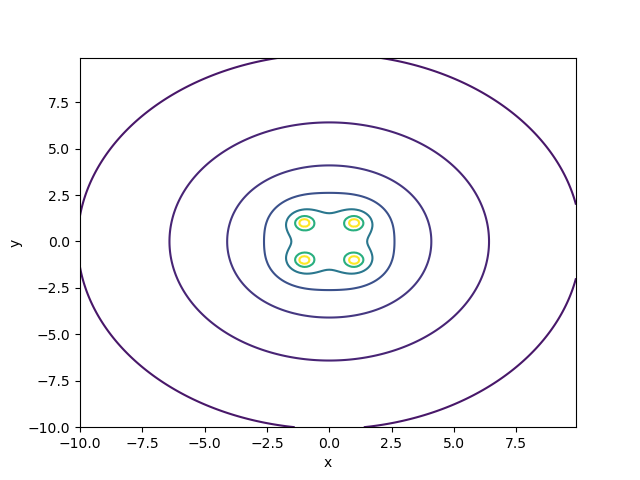

In [45]:
plt.figure(2)
plt.contour(xx,xx,twoDpotential,10**np.arange(-2,1,.2))
plt.xlabel('x')
plt.ylabel('y')
plt.show()